<a href="https://colab.research.google.com/github/K0SATIN/ML_practical_work_1/blob/main/bonustask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Устанавливаем Seaborn для построения графиков
!pip install -q seaborn
import pandas as pd
import time
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import tempfile
import os
import tensorflow as tf
import tensorflow_datasets as tfds
# Установим по умолчанию размер фигуры для Matplotlib по умолчанию.
matplotlib.rcParams['figure.figsize'] = [9, 6]
import datetime

In [ ]:
#получаем ссылку на архив с yandex.disc
import requests
from urllib.parse import urlencode
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/71nei3odFEaRXQ'  # Сюда вписываете вашу ссылку
# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [ ]:
from requests import get
response = get(download_url)

In [ ]:
with open('data_sets.zip', 'wb') as f:
  for chunk in response.iter_content(chunk_size=8192):
    f.write(chunk)
# Разархивация датасета в директорию 'the_movies_dataset'
!unzip -qo "data_sets.zip" -d ./data_sets
# Папка с распакованным датасетом
FILE_PATH = './data_sets'

In [ ]:
test_data = pd.read_csv(f'{FILE_PATH}/datatest.csv')

In [ ]:
train_data = pd.read_csv(f'{FILE_PATH}/datatrain.csv')

In [ ]:
test_data.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,140,02/02/15 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
1,141,02/02/15 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
2,142,02/02/15 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
3,143,02/02/15 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
4,144,02/02/15 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
test_data.describe()

,id,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,1472.000000,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,769.463558,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,140.000000,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,806.000000,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,1472.000000,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,2138.000000,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,2804.000000,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [ ]:
train_data.describe()

,id,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000,17895.000000
mean,8948.000000,20.827630,27.998747,121.453183,686.479722,0.004258,0.211120
std,5165.985869,1.036616,5.169896,202.207255,313.669585,0.000784,0.408115
min,1.000000,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,4474.500000,20.100000,24.890000,0.000000,458.750000,0.003767,0.000000
50%,8948.000000,20.625000,27.793333,0.000000,564.000000,0.004343,0.000000
75%,13421.500000,21.500000,31.856667,217.916667,792.000000,0.004860,0.000000
max,17895.000000,24.390000,39.500000,1581.000000,2076.500000,0.006476,1.000000


In [ ]:
train_data['date']

,date
0,02/04/15 17:51
1,02/04/15 17:51
2,02/04/15 17:53
3,02/04/15 17:54
4,02/04/15 17:55
...,...
17890,02/18/15 9:15
17891,02/18/15 9:16
17892,02/18/15 9:16
17893,02/18/15 9:17


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17895 entries, 0 to 17894
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17895 non-null  int64  
 1   date           17895 non-null  object 
 2   Temperature    17895 non-null  float64
 3   Humidity       17895 non-null  float64
 4   Light          17895 non-null  float64
 5   CO2            17895 non-null  float64
 6   HumidityRatio  17895 non-null  float64
 7   Occupancy      17895 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.1+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2665 non-null   int64  
 1   date           2665 non-null   object 
 2   Temperature    2665 non-null   float64
 3   Humidity       2665 non-null   float64
 4   Light          2665 non-null   float64
 5   CO2            2665 non-null   float64
 6   HumidityRatio  2665 non-null   float64
 7   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 166.7+ KB


In [ ]:
def convert_data_to_ML(test_data):
  test_data_poligon = test_data['date']
  a = test_data_poligon[1].split(' ')
  for i, time in enumerate(test_data_poligon):
    time = time.split(" ")[1]
    #print("Элемент №{} = {}".format(i, time))
    test_data_poligon[i] = time
    #print(test_data_poligon[i])
  relative_time_list = [0] * len(test_data_poligon)
  for i, time in enumerate(test_data_poligon):
    time = time.split(":")
    hours = int(time[0])*60
    minuts = int(time[1])
    fulltime = hours + minuts
    relative_time = fulltime/1439 #число минут в сутках с учётом того, что максимум 23:59
    #print(relative_time)
    relative_time_list[i] = relative_time
    #print(i)
  relative_time_list_1 = pd.DataFrame(relative_time_list)
  relative_time_list_1.columns  = ['relative_time']
  test_data['relative_time'] = relative_time_list_1['relative_time']
  test_data.head(3)

In [ ]:
convert_data_to_ML(test_data)

In [ ]:
convert_data_to_ML(train_data)

In [ ]:
test_data.head(3)

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,relative_time
0,140,14:19,23.700,26.272,585.200000,749.200000,0.004764,1,0.596942
1,141,14:19,23.718,26.290,578.400000,760.400000,0.004773,1,0.596942
2,142,14:21,23.730,26.230,572.666667,769.666667,0.004765,1,0.598332


In [ ]:
train_data.head(3)

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,relative_time
0,1,17:51,23.18,27.2720,426.0,721.25,0.004793,1,0.744267
1,2,17:51,23.15,27.2675,429.5,714.00,0.004783,1,0.744267
2,3,17:53,23.15,27.2450,426.0,713.50,0.004779,1,0.745657


In [ ]:
X_train_data = train_data.drop(['date', 'Occupancy'], axis=1)
X_train_data.head()

,id,Temperature,Humidity,Light,CO2,HumidityRatio,relative_time
0,1,23.18,27.2720,426.0,721.25,0.004793,0.744267
1,2,23.15,27.2675,429.5,714.00,0.004783,0.744267
2,3,23.15,27.2450,426.0,713.50,0.004779,0.745657
3,4,23.15,27.2000,426.0,708.25,0.004772,0.746352
4,5,23.10,27.2000,426.0,704.50,0.004757,0.747047


In [ ]:
y_train = train_data[['Occupancy']].copy()
y_train.head()

,Occupancy
0,1
1,1
2,1
3,1
4,1


In [ ]:
X_test_data = test_data.drop(['date', 'Occupancy'], axis=1)
X_test_data.head()

,id,Temperature,Humidity,Light,CO2,HumidityRatio,relative_time
0,140,23.7000,26.272,585.200000,749.200000,0.004764,0.596942
1,141,23.7180,26.290,578.400000,760.400000,0.004773,0.596942
2,142,23.7300,26.230,572.666667,769.666667,0.004765,0.598332
3,143,23.7225,26.125,493.750000,774.750000,0.004744,0.599027
4,144,23.7540,26.200,488.600000,779.000000,0.004767,0.599722


In [ ]:
y_test = test_data[['Occupancy']].copy()
y_test.head()

,Occupancy
0,1
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test_data = sc.fit_transform(X_test_data)
X_train_data = sc.fit_transform(X_train_data)

In [ ]:
!pip install xgboost

In [ ]:
!pip install scikit-learn==1.1.3

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
XGB_model = xgb.XGBClassifier(
    learning_rate=0.15,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.7,
    gamma=0.9,
    n_estimators=2000
)
XGB_model.fit(X_train_data, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.9, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
result_train = XGB_model.score(X_train_data, y_train)
print("Accuracy : {}".format(result_train))

Accuracy : 0.9984353171276893


In [ ]:
result_test = XGB_model.score(X_test_data, y_test)
print("Accuracy : {}".format(result_test))

Accuracy : 0.9557223264540338


In [ ]:
y_predict = XGB_model.predict(X_test_data)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1693
           1       0.96      0.92      0.94       972

    accuracy                           0.96      2665
   macro avg       0.96      0.95      0.95      2665
weighted avg       0.96      0.96      0.96      2665



Text(0.5, 36.72222222222221, 'Actual class')

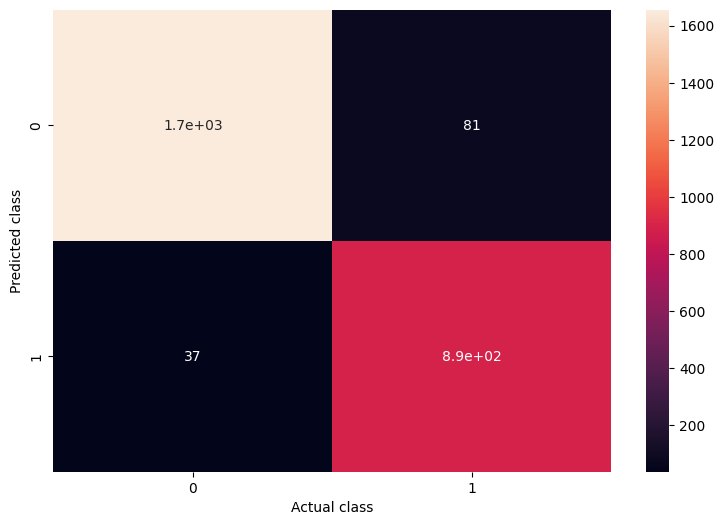

In [ ]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True)
plt.ylabel('Predicted class')
plt.xlabel('Actual class')